In [8]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached labelme-5.2.0.post4-py3-none-any.whl
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
  Using cached imgviz-1.7.2-py3-none-any.whl (7.7 MB)
  Using cached natsort-8.3.1-py3-none-any.whl (38 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-win_amd64.whl (38.1 MB)


Here are all neccesary libraries necessary for this part

In [2]:
import os
import time
import uuid
import cv2
import shutil
import albumentations as alb
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
IMAGES_PATH = os.path.join('data', 'photos') # path to place where the photos are collected
number_images = 20                           # number of photos I want to take

Functions used in the code

In [7]:
def load_image(x): 
    '''function used to load photos 
    base on input which is path to file'''
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [8]:
def copy_files(file_list, source_dir, dest_dir):
    'function used to copy file from one directory to another'
    for file in file_list:
        shutil.copy(os.path.join(source_dir, file), os.path.join(dest_dir, file))

### Collecting photos 

This function in a loop take photos from camera with 0,5s delay. It also provides unique name for photo using uuid

In [77]:
cap = cv2.VideoCapture(0) # it is an video capture object, inside there is an number of camera (you need to change for your own)

In [78]:
for image_num in range(number_images):
    ret, frame = cap.read()
    image_name = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg') # uuid.uuid1(), this provides unique label for our photo and create path 
    cv2.imwrite(image_name, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Label my hand

"LabelMe" is a web-based image annotation tool that allows users to draw bounding boxes around objects in images and assign labels to those objects. Thanks to this I could label my fist and use it in next step. 

In [1]:
!labelme

Traceback (most recent call last):
  File "C:\Users\andrz\anaconda3\lib\site-packages\labelme\widgets\canvas.py", line 681, in paintEvent
    drawing_shape.paint(p)
  File "C:\Users\andrz\anaconda3\lib\site-packages\labelme\shape.py", line 181, in paint
    assert len(self.points) in [1, 2]
AssertionError


### Load images

In this section, examples of photos are displayed. These photos have been captured or obtained from a source and are being processed using TensorFlow and NumPy libraries.

In [10]:
data = tf.data.Dataset.list_files('data\\photos\\*.jpg', shuffle = False)

In [13]:
images = data.map(load_image)

In [14]:
images.as_numpy_iterator().next()

array([[[140, 160, 169],
        [140, 160, 169],
        [138, 161, 169],
        ...,
        [ 59,  70,  62],
        [ 61,  73,  63],
        [ 59,  71,  61]],

       [[140, 160, 169],
        [140, 160, 169],
        [138, 161, 169],
        ...,
        [ 60,  72,  62],
        [ 62,  74,  64],
        [ 61,  73,  63]],

       [[140, 160, 169],
        [141, 161, 170],
        [141, 161, 170],
        ...,
        [ 61,  73,  63],
        [ 64,  74,  65],
        [ 62,  72,  61]],

       ...,

       [[160, 190, 214],
        [160, 190, 214],
        [160, 190, 214],
        ...,
        [103, 121, 133],
        [103, 122, 136],
        [103, 122, 136]],

       [[160, 190, 214],
        [160, 190, 214],
        [160, 190, 214],
        ...,
        [103, 123, 134],
        [103, 123, 134],
        [102, 122, 133]],

       [[159, 189, 213],
        [160, 190, 214],
        [160, 190, 214],
        ...,
        [105, 125, 136],
        [104, 124, 135],
        [103, 123, 134]]

In [16]:
image_generator = images.batch(4).as_numpy_iterator()

In [17]:
plot_images = image_generator.next()

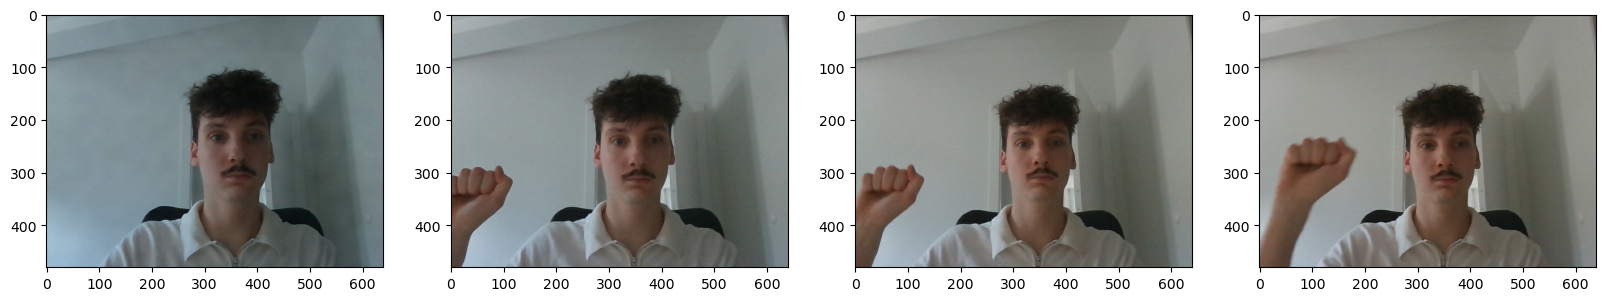

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# Creating train, test and val data sets

In this section dataset is splitted for test, train and validation sets.

In [3]:
# set paths to X and Y image folders
photos_path = "data\\photos\\"
labels_path = "data\\labels\\"

In [4]:
# get list of file names for X and Y images
photos_files = os.listdir(photos_path)
labels_files = os.listdir(labels_path)

In [21]:
photos_files = photos_files[1:]
labels_files = labels_files[1:]

In [22]:
# split data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(photos_files, labels_files, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [63]:
# print the size of each set
print("Training set size: ", len(x_train))
print("Validation set size: ", len(x_val))
print("Test set size: ", len(x_test))

Training set size:  84
Validation set size:  18
Test set size:  18


In [65]:
y_train_dir = "data\\train\\labels"
y_test_dir = "data\\test\\labels"
y_val_dir = "data\\val\\labels"
x_train_dir = "data\\train\\photos"
x_test_dir = "data\\test\\photos"
x_val_dir = "data\\val\\photos"

In [66]:
# Copy files to appropriate directories
copy_files(x_train, photos_path, x_train_dir)
copy_files(y_train, labels_path, y_train_dir)
copy_files(x_test, photos_path, x_test_dir)
copy_files(y_test, labels_path, y_test_dir)
copy_files(x_val, photos_path, x_val_dir)
copy_files(y_val, labels_path, y_val_dir)

## Albumentations

Albumentations is very useful when we want to enlarge our data set. Albumentations is a popular open-source library for image augmentation. It provides a wide variety of transformation techniques such as geometric, color, and blur transformations that can be applied to images.

In [29]:
augmentor = alb.Compose([alb.HorizontalFlip(p=0.5),             # This transformation horizontally flips the input image with a probability of 0.5.
                         alb.RandomBrightnessContrast(p=0.2),   # This transformation randomly adjusts the brightness and contrast of the input image with a probability of 0.2.
                         alb.RandomGamma(p=0.2),                # This transformation randomly adjusts the gamma of the input image with a probability of 0.2.
                         alb.RGBShift(p=0.2),                   # This transformation randomly shifts the values of the red, green, and blue channels of the input image with a probability of 0.2.
                         alb.VerticalFlip(p=0.5)])              # This transformation vertically flips the input image with a probability of 0.5.

In [36]:
for partition in ['train', 'test', 'val']:                                   # in loop we make albumentation for every folder
    list_im = os.listdir(os.path.join('data', partition, 'photos'))          # creating directory for folder with photos
    list_im = list_im[1:]
    
    for image in list_im:
        img = cv2.imread(os.path.join('data', partition, 'photos', image))   # reading photo
 
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json') # directory for labels
        with open(label_path, 'r') as f:                                     # reading label
            label = json.load(f)
            
        try: 
            for x in range(10):                                              # creating 10 new files based on one photo
                augmented = augmentor(image=img, class_labels=['fist'])      '''This code applies the image augmentation 
                                                                                 transformations defined in augmentor to 
                                                                                 a single input image img.'''
                cv2.imwrite(os.path.join('aug_data4', partition, 'photos', 
                                         f'{image.split(".")[0]}.{x}.jpg'), augmented['image']) # saving photo

                annotation = {}                                              # information needed for labels
                annotation['image'] = image                                  # name of photo
                
                if label["shapes"] == []:                                    # check if the photo contains fist or no
                    annotation['class'] = 0
                else: 
                    annotation['class'] = 1 


                with open(os.path.join('aug_data4', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)                                # saving label

        except Exception as e:
            print(e) 
